In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from scipy.spatial import distance
from tensorflow.keras import datasets, layers, models
import glob
from skimage import io
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [3]:
new_model = tf.keras.models.load_model('sia_model_new.h5', compile=False)
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 196, 196, 64)      2112      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 16)        9232      
                                                                 
 conv2d_4 (Conv2D)           (None, 94, 94, 32)        4640      
                                                        

1/1 [==============================] - 0s 20ms/step


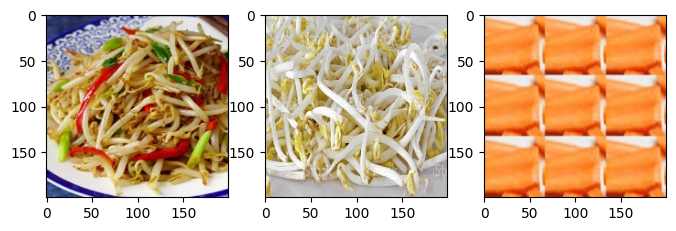

Anc-Pos: 0.043633636 Anc-Neg: 0.09284463 Pos-Neg: 0.10657931


In [5]:
w = 200
h = 200
columns = 3
rows = 1


anc_img = cv2.imread(f"E:\\Namespace\\CALCU\\Dataset_Siamese\\test1\\Bean_Sprouts1\\Bean_Sprouts (182).jpg")
anc_img = cv2.resize(anc_img,(w,h)) 

pos_img = cv2.imread(f"E:\\Namespace\\CALCU\\Dataset_Siamese\\test1\\Bean_Sprouts1\\Bean_Sprouts (183).jpg")
pos_img = cv2.resize(pos_img,(w,h)) 

neg_img = cv2.imread(f"E:\\Namespace\\CALCU\\Dataset_Siamese\\test1\\Carrot1\\Carrot (597).jpg")
neg_img = cv2.resize(neg_img,(w,h)) 

image_set = np.stack([anc_img/ 255. , pos_img/ 255. , neg_img/ 255. ], axis=0)

output = new_model.predict(image_set)

#post_dst = tf.reduce_sum(tf.square(tf.subtract(output[0,:], output[1,:])))
post_dst= 0.5*(tf.math.reduce_variance(tf.subtract(output[0,:], output[1,:]))   / \
        (tf.math.reduce_variance(output[0,:])+tf.math.reduce_variance(output[1,:])))
#   neg_dst = tf.reduce_sum(tf.square(tf.subtract(output[0,:], output[2,:])))
neg_dst = 0.5*(tf.math.reduce_variance(tf.subtract(output[0,:], output[2,:]))   / \
        (tf.math.reduce_variance(output[0,:])+tf.math.reduce_variance(output[2,:])))
#   ac_neg_dst = tf.reduce_sum(tf.square(tf.subtract(output[1,:], output[2,:])))
ac_neg_dst = 0.5*(tf.math.reduce_variance(tf.subtract(output[1,:], output[2,:]))   / \
        (tf.math.reduce_variance(output[1,:])+tf.math.reduce_variance(output[2,:])))

   
fig = plt.figure(figsize=(8, 8))
for i, img in zip(range(1, columns*rows +1), [anc_img , pos_img , neg_img ]):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[..., ::-1])
    

plt.show()
    
print("Anc-Pos:",post_dst.numpy(), "Anc-Neg:",neg_dst.numpy(), "Pos-Neg:",ac_neg_dst.numpy())
 

1/1 [==============================] - 0s 20ms/step


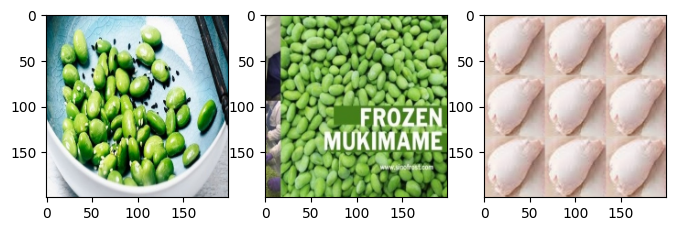

0.0021027718 0.17992827 0.18441057
1/1 [==============================] - 0s 20ms/step


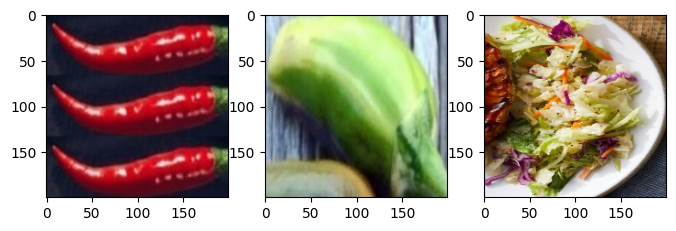

0.056979306 0.045786157 0.05605959
1/1 [==============================] - 0s 18ms/step


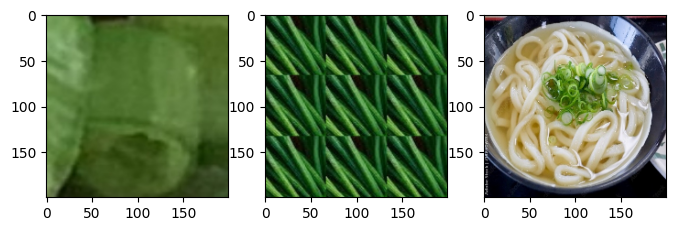

0.046481896 0.112544075 0.07300231
1/1 [==============================] - 0s 22ms/step


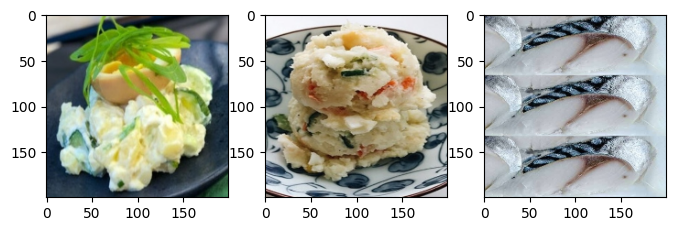

0.035898633 0.061401725 0.041078415
1/1 [==============================] - 0s 20ms/step


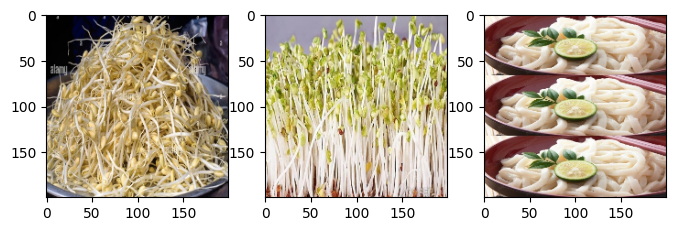

0.03656714 0.04489586 0.015147325
1/1 [==============================] - 0s 20ms/step


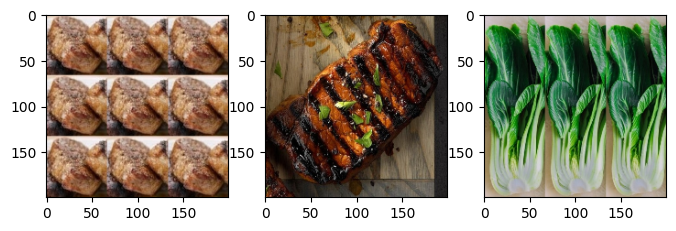

0.021065114 0.12620433 0.090376206
1/1 [==============================] - 0s 20ms/step


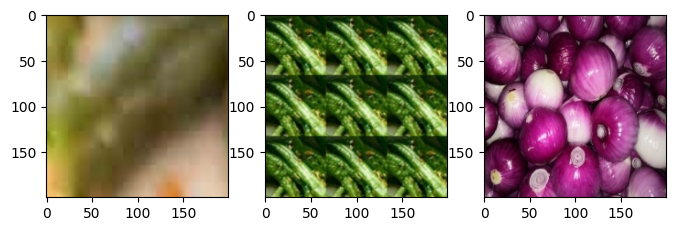

0.044023454 0.07132271 0.08424987
1/1 [==============================] - 0s 19ms/step


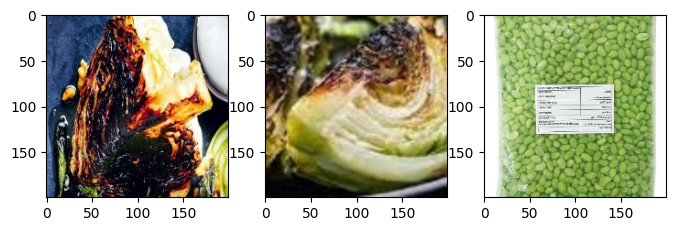

0.035613168 0.07338376 0.036582693
1/1 [==============================] - 0s 20ms/step


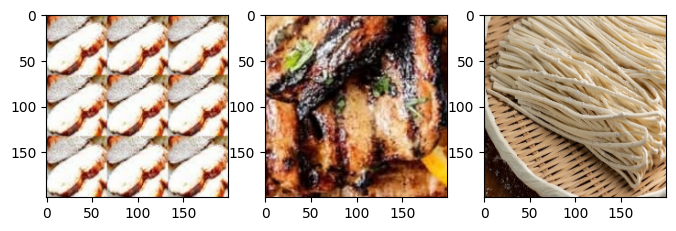

0.015144458 0.11347747 0.12197692
1/1 [==============================] - 0s 19ms/step


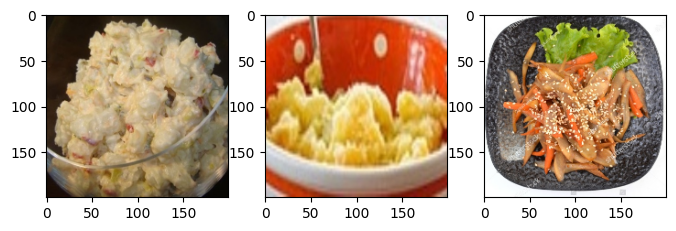

0.051052283 0.034200802 0.06108003
1/1 [==============================] - 0s 19ms/step


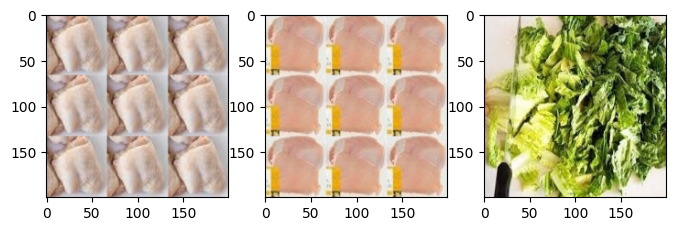

0.024052883 0.15546066 0.12739886
1/1 [==============================] - 0s 19ms/step


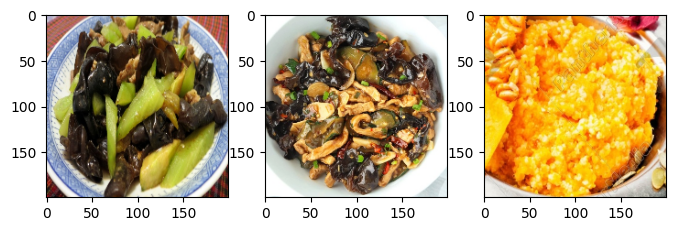

0.05843535 0.07594394 0.04044891
1/1 [==============================] - 0s 19ms/step


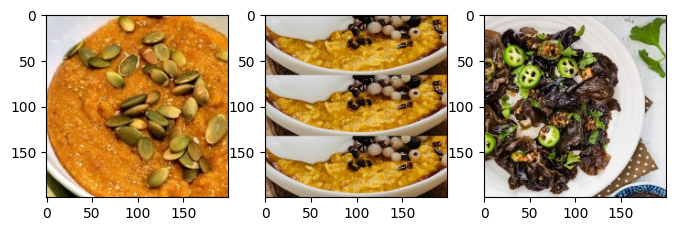

0.012099466 0.046560373 0.0503403
1/1 [==============================] - 0s 20ms/step


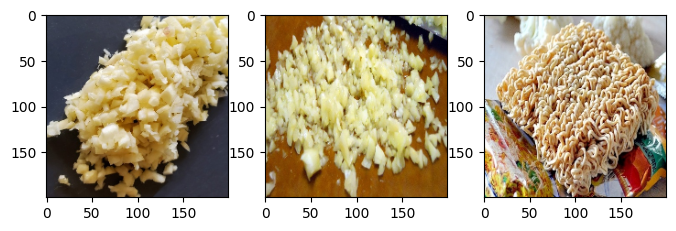

0.011523348 0.038165893 0.06568092
1/1 [==============================] - 0s 19ms/step


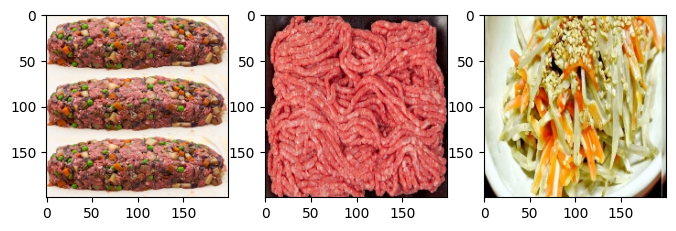

0.027507117 0.057904143 0.11246281
1/1 [==============================] - 0s 19ms/step


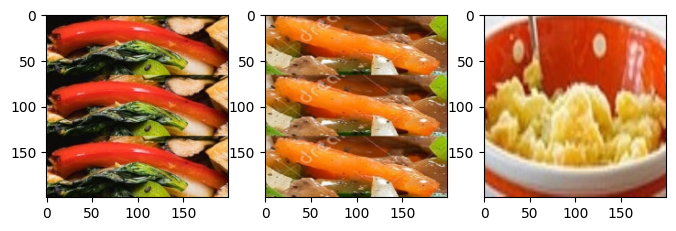

0.06293576 0.06835687 0.021257468
1/1 [==============================] - 0s 21ms/step


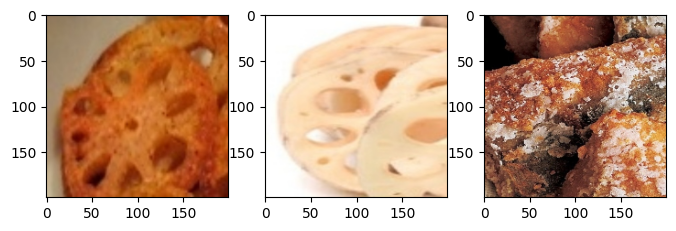

0.04434212 0.06419075 0.08028212
1/1 [==============================] - 0s 19ms/step


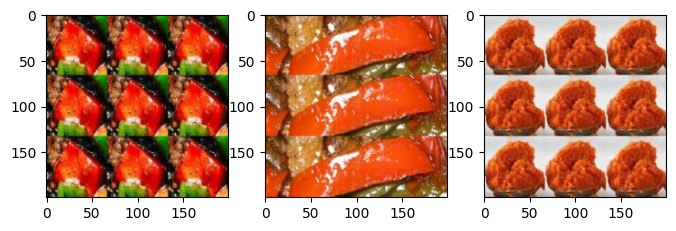

0.0109077515 0.01878238 0.0034348387
1/1 [==============================] - 0s 19ms/step


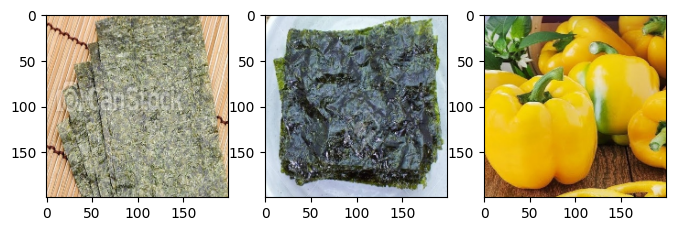

0.062176697 0.06794378 0.109697476
1/1 [==============================] - 0s 19ms/step


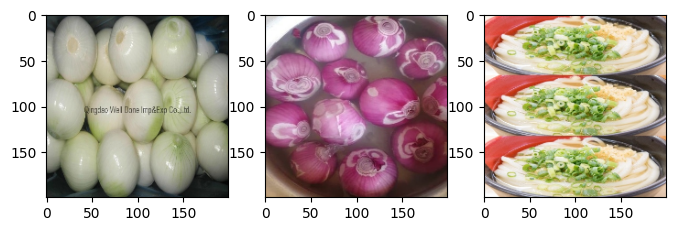

0.03618533 0.043203227 0.060263388
1/1 [==============================] - 0s 19ms/step


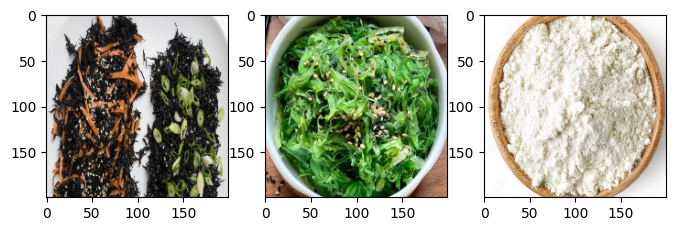

0.05206639 0.12365942 0.14020267
1/1 [==============================] - 0s 19ms/step


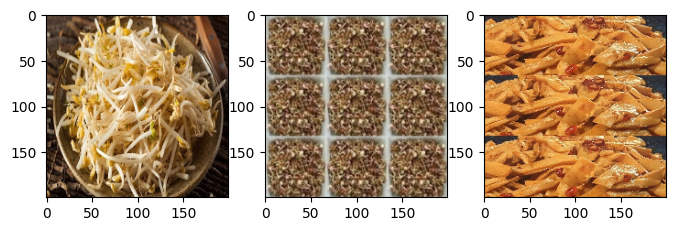

0.049639367 0.0726876 0.054475486
1/1 [==============================] - 0s 20ms/step


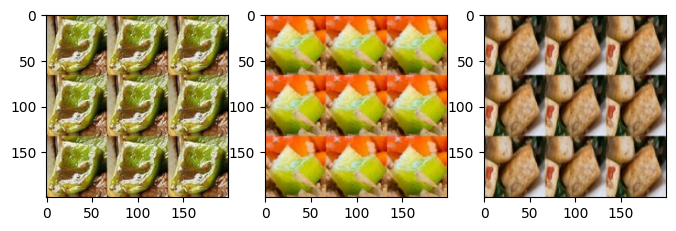

0.024868729 0.060460787 0.07176409
1/1 [==============================] - 0s 18ms/step


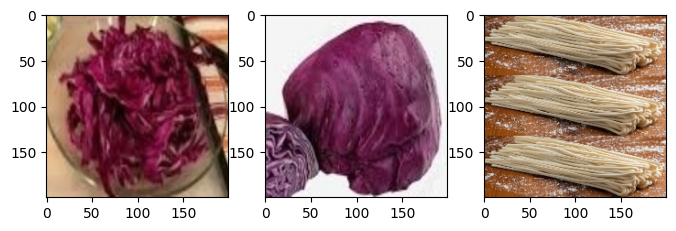

0.0035842028 0.08561806 0.08377614
1/1 [==============================] - 0s 18ms/step


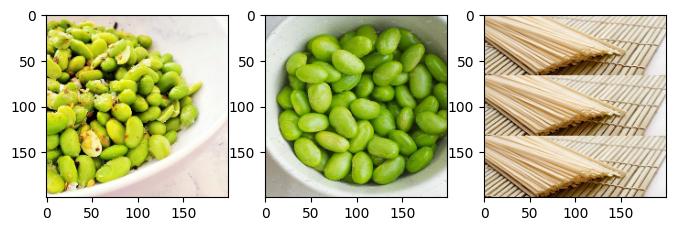

0.0112591935 0.08879211 0.11496464


In [11]:
w = 200
h = 200
columns = 3
rows = 1
base_path = "E:\\Namespace\\CALCU\\Dataset_Siamese\\test\\"

for num in range(25): 
  classes = os.listdir(base_path)

  anc_class = random.choice(classes)
  classes.remove(anc_class)
  neg_class = random.choice(classes)
  # print(anc_class, neg_class)

  

  anc_path = base_path + anc_class + "/" +  random.choice(os.listdir(f"{base_path}{anc_class}"))
  pos_path = base_path + anc_class + "/" +  random.choice(os.listdir(f"{base_path}{anc_class}"))
  neg_path = base_path + neg_class + "/" +  random.choice(os.listdir(f"{base_path}{neg_class}"))


  # print(anc_path)
  anc_img = cv2.imread(anc_path)
  anc_img = cv2.resize(anc_img,(200,200)) 

  pos_img = cv2.imread(pos_path)
  pos_img = cv2.resize(pos_img,(200,200)) 

  neg_img = cv2.imread(neg_path)
  neg_img = cv2.resize(neg_img,(200,200)) 

  image_set = np.stack([anc_img/ 255. , pos_img/ 255. , neg_img/ 255. ], axis=0)

  output = new_model.predict(image_set)

  #post_dst = tf.reduce_sum(tf.square(tf.subtract(output[0,:], output[1,:])))
  post_dst= 0.5*(tf.math.reduce_variance(tf.subtract(output[0,:], output[1,:]))   / \
    (tf.math.reduce_variance(output[0,:])+tf.math.reduce_variance(output[1,:])))
#   neg_dst = tf.reduce_sum(tf.square(tf.subtract(output[0,:], output[2,:])))
  neg_dst = 0.5*(tf.math.reduce_variance(tf.subtract(output[0,:], output[2,:]))   / \
    (tf.math.reduce_variance(output[0,:])+tf.math.reduce_variance(output[2,:])))
#   ac_neg_dst = tf.reduce_sum(tf.square(tf.subtract(output[1,:], output[2,:])))
  ac_neg_dst = 0.5*(tf.math.reduce_variance(tf.subtract(output[1,:], output[2,:]))   / \
    (tf.math.reduce_variance(output[1,:])+tf.math.reduce_variance(output[2,:])))

   
  fig = plt.figure(figsize=(8, 8))
  for i, img in zip(range(1, columns*rows +1), [anc_img , pos_img , neg_img ]):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[..., ::-1])
    

  plt.show()
  print(post_dst.numpy(), neg_dst.numpy(), ac_neg_dst.numpy())